# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | rosa zarate
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | nova vicosa
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | zvishavane
Processing Record 18 of Set 1 | pangody
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | hovd
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processin

Processing Record 41 of Set 4 | pachino
Processing Record 42 of Set 4 | ingeniero jacobacci
Processing Record 43 of Set 4 | hammerfest
Processing Record 44 of Set 4 | gubkinskiy
Processing Record 45 of Set 4 | bratsk
Processing Record 46 of Set 4 | kirensk
Processing Record 47 of Set 4 | vorgashor
Processing Record 48 of Set 4 | hermanus
Processing Record 49 of Set 4 | pawai
Processing Record 0 of Set 5 | hotan
Processing Record 1 of Set 5 | den burg
Processing Record 2 of Set 5 | ta`u
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | palikir - national government center
Processing Record 5 of Set 5 | zhytkavichy
Processing Record 6 of Set 5 | cockburn town
Processing Record 7 of Set 5 | dadeldhura
Processing Record 8 of Set 5 | aras-asan
Processing Record 9 of Set 5 | baklan
Processing Record 10 of Set 5 | tiruchchendur
Processing Record 11 of Set 5 | argo
Processing Record 12 of Set 5 | mount pearl
Processing Record 13 of Set 5 | nivala
Processing Record 14 of S

Processing Record 35 of Set 8 | kultali
City not found. Skipping...
Processing Record 36 of Set 8 | dieppe
Processing Record 37 of Set 8 | port-vila
Processing Record 38 of Set 8 | ahau
City not found. Skipping...
Processing Record 39 of Set 8 | whakatane
Processing Record 40 of Set 8 | kirando
Processing Record 41 of Set 8 | l'isle-sur-la-sorgue
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | tralee
Processing Record 44 of Set 8 | samsun
Processing Record 45 of Set 8 | thunder bay
Processing Record 46 of Set 8 | victoria
Processing Record 47 of Set 8 | meadow lakes
Processing Record 48 of Set 8 | dakhla
Processing Record 49 of Set 8 | badiyah
Processing Record 0 of Set 9 | sisimiut
Processing Record 1 of Set 9 | mandali
Processing Record 2 of Set 9 | cabedelo
Processing Record 3 of Set 9 | champerico
Processing Record 4 of Set 9 | keflavik
Processing Record 5 of Set 9 | karak city
Processing Record 6 of Set 9 | bambanglipuro
Processing Record 7 of Set 9 | ula

Processing Record 20 of Set 12 | polyarnyy
Processing Record 21 of Set 12 | outapi
City not found. Skipping...
Processing Record 22 of Set 12 | yandev
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | daru
Processing Record 25 of Set 12 | yinchuan
Processing Record 26 of Set 12 | karwar
Processing Record 27 of Set 12 | taulaga
Processing Record 28 of Set 12 | ambovombe
Processing Record 29 of Set 12 | nadym
Processing Record 30 of Set 12 | mount isa
Processing Record 31 of Set 12 | tutong
Processing Record 32 of Set 12 | namtsy
Processing Record 33 of Set 12 | shijiang
Processing Record 34 of Set 12 | chifeng
Processing Record 35 of Set 12 | okha
Processing Record 36 of Set 12 | barra
Processing Record 37 of Set 12 | brisas barra de suchiate
Processing Record 38 of Set 12 | roccella ionica
Processing Record 39 of Set 12 | shofirkon shahri
City not found. Skipping...
Processing Record 40 of Set 12 | kavieng
Processing Record 41 of Set 12 | pampas
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,296.18,73,54,7.86,CV,1691609615
1,rosa zarate,0.3333,-79.4667,300.44,79,97,2.91,EC,1691609616
2,gadzhiyevo,69.2551,33.3362,292.98,73,0,1.26,RU,1691609391
3,edinburgh of the seven seas,-37.0676,-12.3116,283.72,64,79,10.29,SH,1691609616
4,enewetak,11.3474,162.3373,301.55,77,82,6.53,MH,1691609616


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,296.18,73,54,7.86,CV,1691609615
1,rosa zarate,0.3333,-79.4667,300.44,79,97,2.91,EC,1691609616
2,gadzhiyevo,69.2551,33.3362,292.98,73,0,1.26,RU,1691609391
3,edinburgh of the seven seas,-37.0676,-12.3116,283.72,64,79,10.29,SH,1691609616
4,enewetak,11.3474,162.3373,301.55,77,82,6.53,MH,1691609616


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

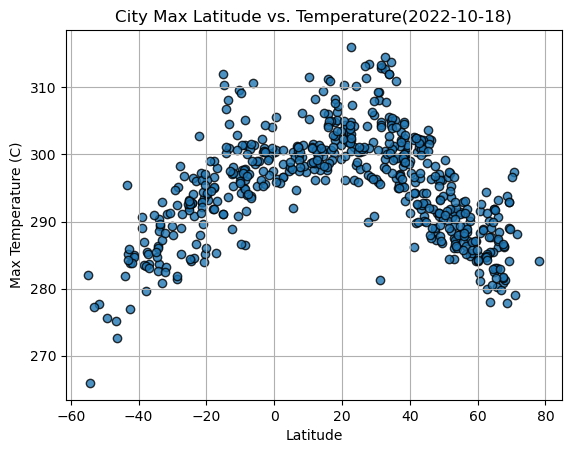

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature(2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

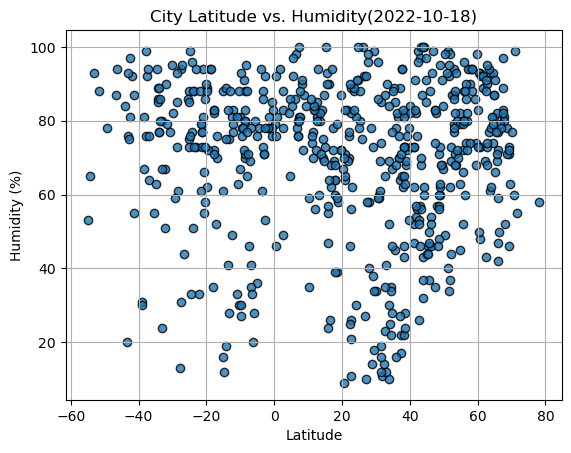

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity(2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

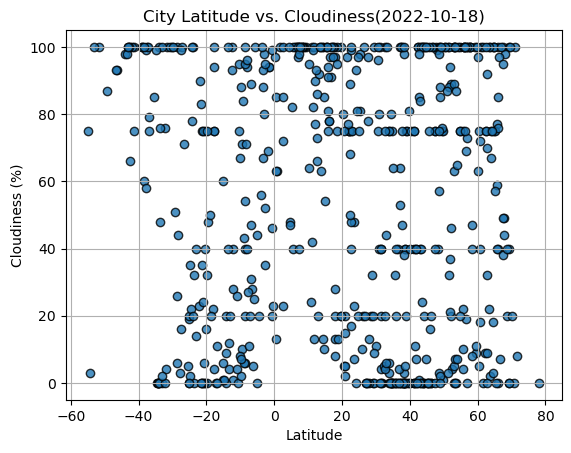

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness(2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

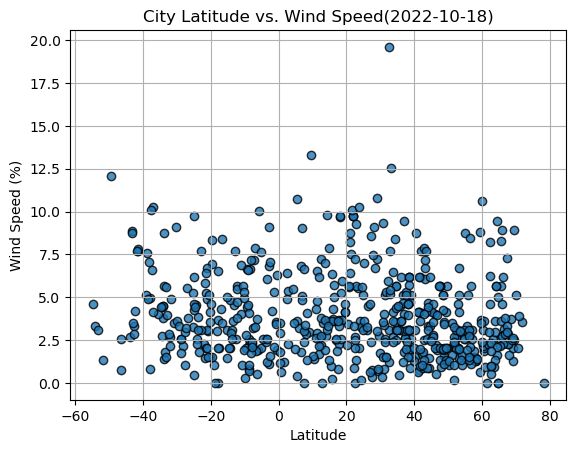

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linearregression(xvalues, yvalues):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(xvalues,yvalues)
    regressvalues=xvalues*slope+intercept
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regressvalues, "r-")
    print(f"the r squared value for the above relationship is:{rvalue*rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,296.18,73,54,7.86,CV,1691609615
1,rosa zarate,0.3333,-79.4667,300.44,79,97,2.91,EC,1691609616
2,gadzhiyevo,69.2551,33.3362,292.98,73,0,1.26,RU,1691609391
4,enewetak,11.3474,162.3373,301.55,77,82,6.53,MH,1691609616
7,iqaluit,63.7506,-68.5145,278.00,93,100,3.60,CA,1691609381


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,283.72,64,79,10.29,SH,1691609616
5,waitangi,-43.9535,-176.5597,281.94,84,98,2.68,NZ,1691609324
6,port-aux-francais,-49.3500,70.2167,275.63,78,87,12.06,TF,1691609363
10,adamstown,-25.0660,-130.1015,292.22,73,19,9.76,PN,1691609363
11,nova vicosa,-17.8919,-39.3719,296.63,72,4,3.67,BR,1691609573


###  Temperature vs. Latitude Linear Regression Plot

the r squared value for the above relationship is:0.4858215968812473


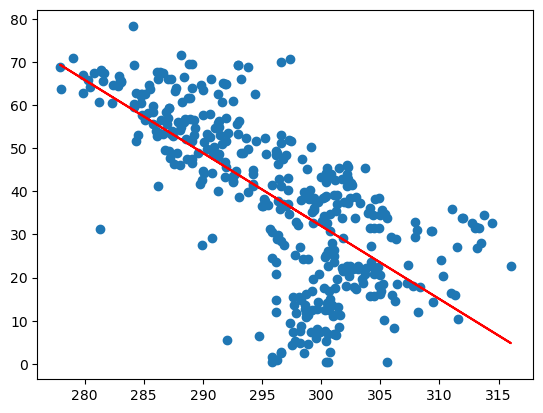

In [22]:
# Linear regression on Northern Hemisphere
plot_linearregression(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"])

the r squared value for the above relationship is:0.5954726702449517


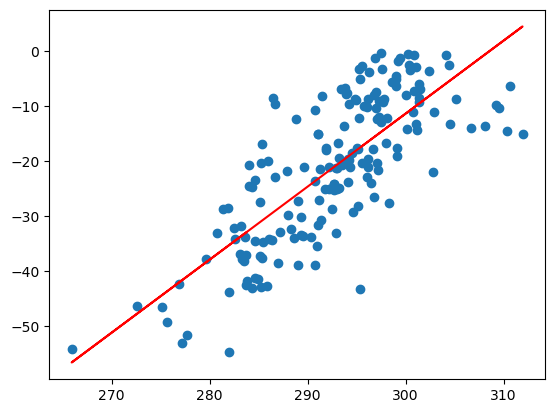

In [24]:
# Linear regression on Southern Hemisphere
plot_linearregression(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** I see that the temperature drops as you increase further north along the latitude. Likewise, the temperature decreases as you head further south along the latitude.

### Humidity vs. Latitude Linear Regression Plot

the r squared value for the above relationship is:0.00281282826526684


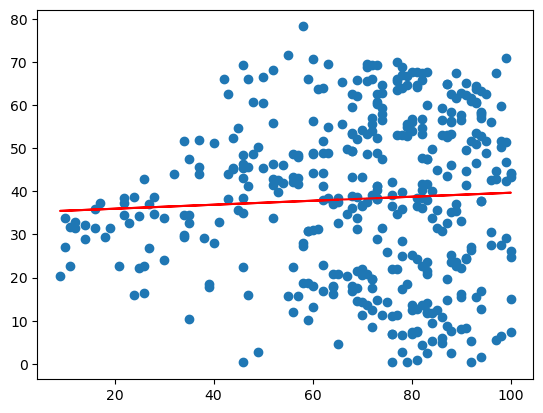

In [25]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Humidity"],northern_hemi_df["Lat"])

the r squared value for the above relationship is:0.012909005928488105


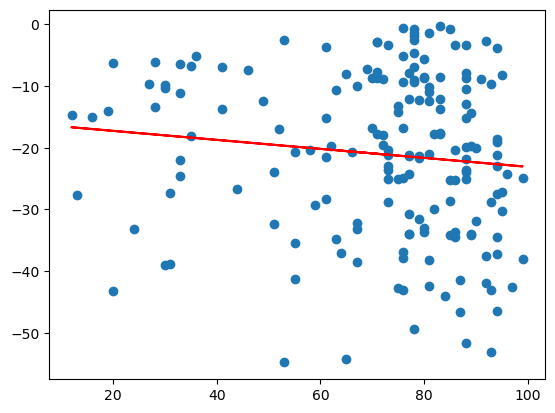

In [26]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Humidity"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** In the northern hemisphere, the humidity remains relatively the same as you go up along the latitude. In the southern hemisphere, the humidity begins to come down, as you head along the latitudinal line.

### Cloudiness vs. Latitude Linear Regression Plot

the r squared value for the above relationship is:0.01641203892888483


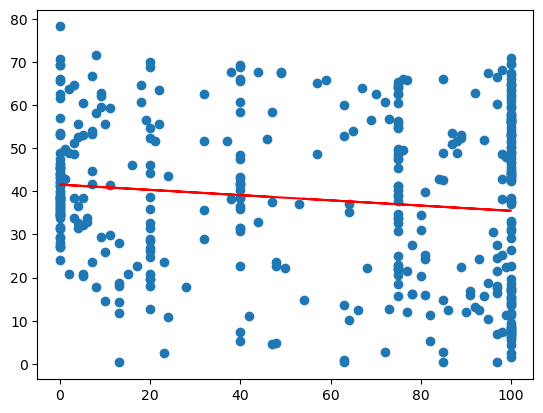

In [27]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"])

the r squared value for the above relationship is:0.04128702449337659


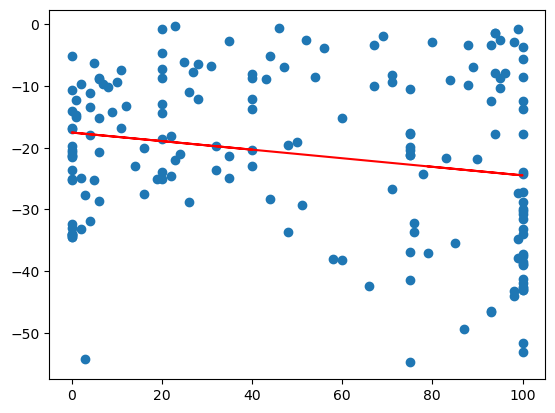

In [28]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** Cloudiness is relativly constant along both the northern and southern latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

the r squared value for the above relationship is:0.02422590792675304


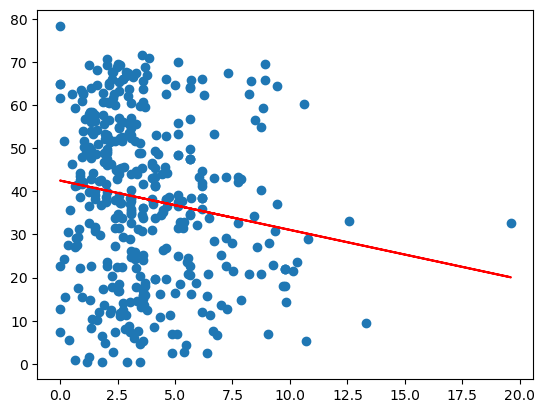

In [29]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"])

the r squared value for the above relationship is:0.020969509330515956


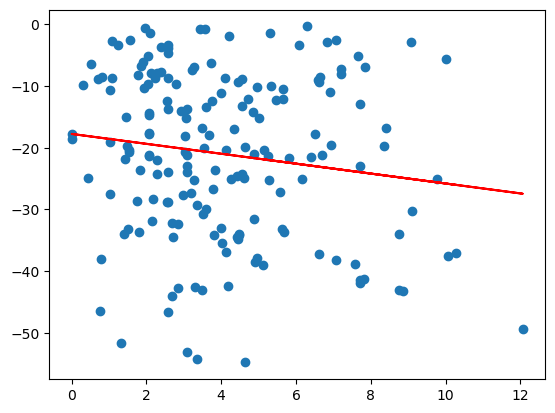

In [30]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** In the northern hemisphere, windspeeds decrease as you head along the latitudinal line. In the southern hemisphere, wind speeds remain roughly constant as you continue along the latitudinal line.